In [11]:
!pip install pymupdf pyzbar
!apt install libzbar0
!pip install pymupdf pyzbar matplotlib
# pip install endesive
!pip install pyzbar
!pip install PyPDF2
!pip install PyPDF2 --upgrade
!pip install tika
!pip install pymupdf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32622 sha256=ee04f6bcd9ba2cfd7e126e794a52349f001f100b8e9f33b5d831435479dbdc9d
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


Image saved: /content/extracted_images/page_0_image_0.png
Image dimensions for Page 0: (300, 300)
No QR Code found on Page 0


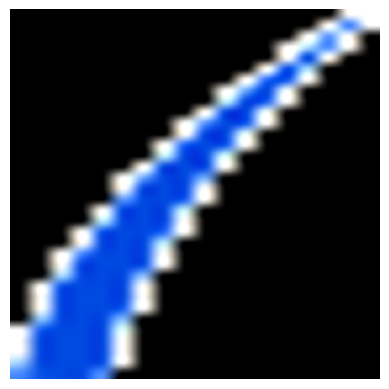

Image saved: /content/extracted_images/page_0_image_1.png
Image dimensions for Page 0: (300, 300)
No QR Code found on Page 0


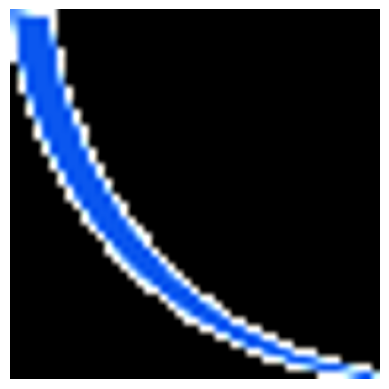

Image saved: /content/extracted_images/page_0_image_2.png
Image dimensions for Page 0: (300, 300)
No QR Code found on Page 0


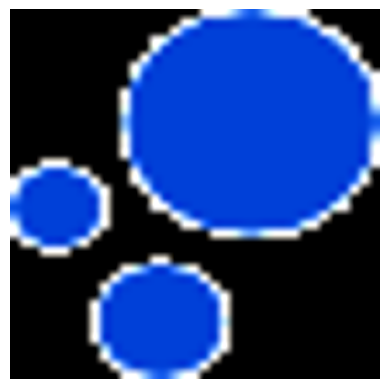

Image saved: /content/extracted_images/page_0_image_3.png
Image dimensions for Page 0: (300, 300)
QR Code data found on Page 0: 
        Service: Excell Broadband
        InvoiceNumber: 16082956
        Invoice Date:  1 Dec 2023
        Custnum: 54554
        CustomerName: MOSES PRABHAKAR ATHOTA
        Phone: 9701514514
        Amount: Rs. 588.82



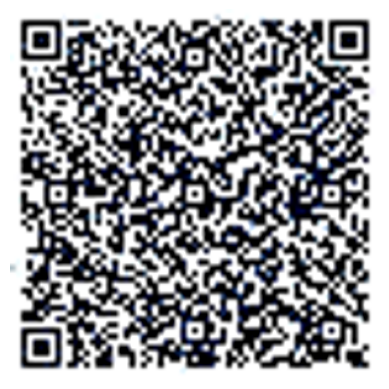

In [30]:
import fitz  # PyMuPDF
import io
import os
from PIL import Image, ImageEnhance
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

def extract_images_and_display_qr_from_pdf(pdf_path, output_folder):
    doc = fitz.open(pdf_path)
    os.makedirs(output_folder, exist_ok=True)
    qr_data = []

    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        for img_index, img in enumerate(page.get_images(full=True)):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image = Image.open(io.BytesIO(image_bytes))
            image_path = f"{output_folder}/page_{page_num}_image_{img_index}.png"
            image.save(image_path, "PNG")
            print(f"Image saved: {image_path}")

            # Check for QR code
            enhancer = ImageEnhance.Contrast(image)
            enhanced_image = enhancer.enhance(2.0)
            resized_image = enhanced_image.resize((300, 300))
            print(f"Image dimensions for Page {page_num}: {resized_image.size}")
            decoded_objects = decode(resized_image)
            if decoded_objects:
                for obj in decoded_objects:
                    qr_data.append(obj.data.decode("utf-8"))
                    print(f"QR Code data found on Page {page_num}: {obj.data.decode('utf-8')}")
            else:
                print(f"No QR Code found on Page {page_num}")

            plt.imshow(resized_image)
            plt.axis('off')
            plt.show()

    doc.close()
    return qr_data

qr_contents = extract_images_and_display_qr_from_pdf('/content/King_excell.pdf', '/content/extracted_images')
# print(qr_contents)


In [31]:
import json
qr_code_data = qr_contents[0]

def parse_qr_data(data):
    fields = data.strip().split('\n')
    parsed_data = {}
    for field in fields:
        key, value = field.split(': ')
        parsed_data[key.strip()] = value.strip()
    return parsed_data
parsed_data = parse_qr_data(qr_code_data)
json_data = json.dumps(parsed_data, indent=4)
print(json_data)
with open('qr_data.json', 'w') as file:
    file.write(json_data)

# print("JSON data written to qr_data.json")


{
    "Service": "Excell Broadband",
    "InvoiceNumber": "16082956",
    "Invoice Date": "1 Dec 2023",
    "Custnum": "54554",
    "CustomerName": "MOSES PRABHAKAR ATHOTA",
    "Phone": "9701514514",
    "Amount": "Rs. 588.82"
}
